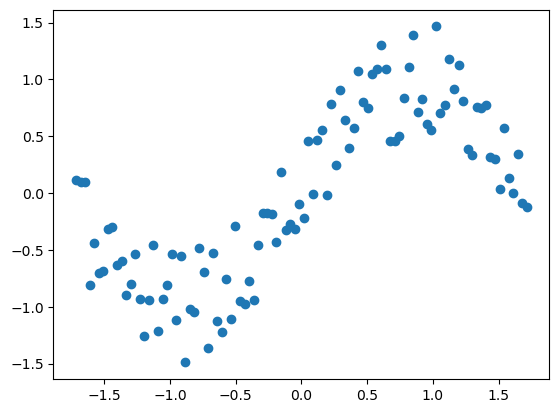

Loss at epoch 0: 2.84
Loss at epoch 100: 0.14
Loss at epoch 200: 0.11
Loss at epoch 300: 0.09
Loss at epoch 400: 0.09
Loss at epoch 500: 0.08
Loss at epoch 600: 0.08
Loss at epoch 700: 0.08
Loss at epoch 800: 0.08
Loss at epoch 900: 0.08


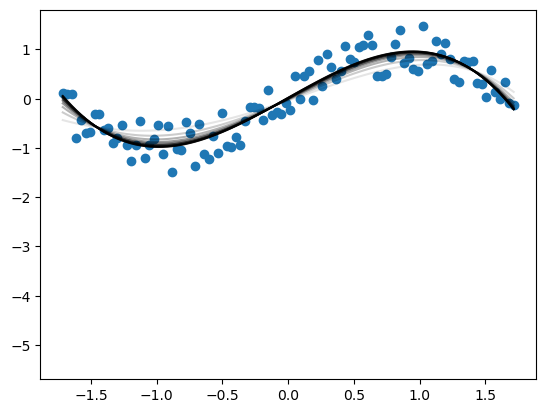

R-squared:  0.8560953895892531


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Generate toy data
n_observations = 100
xs = np.linspace(-3, 3, n_observations).astype(np.float32)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations).astype(np.float32)

# Normalize the input data
xs = (xs - np.mean(xs)) / np.std(xs)

plt.scatter(xs, ys)
plt.show()

# Create tensors
x_tensor = torch.tensor(xs).reshape((-1, 1))
y_tensor = torch.tensor(ys)

class PolyModel(torch.nn.Module):
    def __init__(self, degree=7):
        super(PolyModel, self).__init__()
        self.degree = degree
        self.W = torch.nn.Parameter(torch.randn(degree, requires_grad=True))
        self.B = torch.nn.Parameter(torch.zeros(1, requires_grad=True))

    def forward(self, x):
        y_pred = x.new_full(x.shape, self.B.item())
        for pow_i in range(self.degree):
            y_pred += x.pow(pow_i) * self.W[pow_i]
        return y_pred

model = PolyModel(degree=5)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

n_epochs = 1000
for epoch_i in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = loss_fn(y_tensor, y_pred.reshape(-1))
    loss.backward()

    # Apply gradient clipping
    for p in model.parameters():
        if p.grad is not None:
            p.grad.data.clamp_(-1., 1.)

    optimizer.step()

    if epoch_i % 100 == 0:
        print('Loss at epoch %d: %.2f' % (epoch_i, loss.item()))
        plt.plot(xs, y_pred.detach().numpy(), 'k', alpha=epoch_i / n_epochs)

plt.scatter(xs, ys)
plt.show()
y_pred = model(x_tensor).detach().numpy()

# Compute R-squared
r2 = r2_score(ys, y_pred)

print("R-squared: ", r2)
